# Project 1-Wave Propagation

- Write a python code to provide an interactive interface to simulate the propogation of waves due to dropped pebbles in a pool.

A simple sine wave equation can represent the height of waves at a later time when a pebble is dropped in a pool and waves radiate from where it was dropped: 
$$ h_{1}(x,y)= h_{0}sin(kr_{1})$$

in which $h_{0}$ is the amplitude of the waves,$k$ is wavevector related to the wavelength, $\lambda$: $k= 2pi/\lambda$. $r_{1}$ indicates the distance from the position where the pebble  is dropped $(x,y)$:

$$r_{1}= \sqrt{(x-x_{2})^2 + (y-y_{2})^2}$$

If a second pebble is dropped, which creates another set of waves with the same wavelength and amplitude, but centered at a different position $(x,y)$, the distance $r_{2}$ from the center can be calculated by:

$$r_{2}= \sqrt{(x-x_{2})^2 + (y-y_{2})^2}$$

Since water waves add linearly, the total height of the wave at a point $(x,y)$ is:

$$ h(x,y)= h_{0}sin(kr_{1}) + h_{0}sin(kr_{2})$$

A program in order to display this propagation is written below:

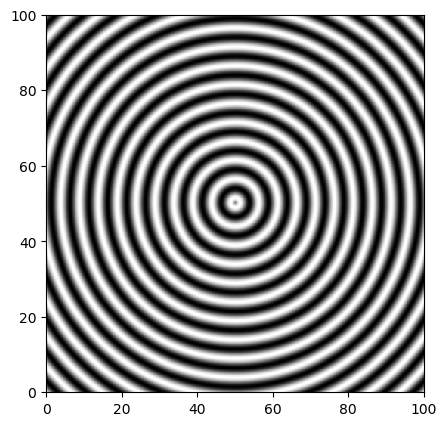

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import sqrt,sin,pi
from numpy import empty
import numpy as np

def waveheight(wavelength, separation, pebbles):
    
    k = 2*pi/wavelength #wavevector
    amp =1.0 #amplitude    
    side = 100.0            
    points = 500           
    spacing = side/points #how far each points are apart   
        
    x_list = [] #store starting x and y of the pebbles
    y_list = [] 
    
    xi = np.zeros((points, points), float) #generate an array to store values of the height 
    for i in range(pebbles):
        x = (side - ((pebbles - 1) * separation)) / 2 + (separation * i) 
        y = side /2 #find starting position of pebble relative to the center
                    #if there's more than 1, find its position which is indicated by the separation                                             
        
        x_list.append(x) #add x and y values to x and y list
        y_list.append(y)

    for i in range(points): #find x and y values relative to side value
        y = spacing*i
        for j in range(points):
            x = spacing*j
            
            r = []
            for l in range(pebbles): #calculate distance of each pebble from its center
                x1 = x_list[l]
                y1 = y_list[l]
                
                r.append(sqrt((x-x1)**2+(y-y1)**2))
            
            height = 0 #store height values of (x,y)
            for l in range(pebbles): #calculate height of the wave for each (x,y)
                height += amp * (sin(k*r[l])) 
                #if there are 2 pebbles, this will iterate 2x, 3x if there are 3 pebbles etc.
                
            xi[i,j] = height

    plt.figure(figsize=[5,5], dpi=100)      
    plt.imshow(xi,origin="lower",extent=[0,side,0,side]) #plot wave function
    plt.gray()
    plt.show()

waveheight(wavelength=5,separation= 25,pebbles= 1)

Plot for two pebbles would be:

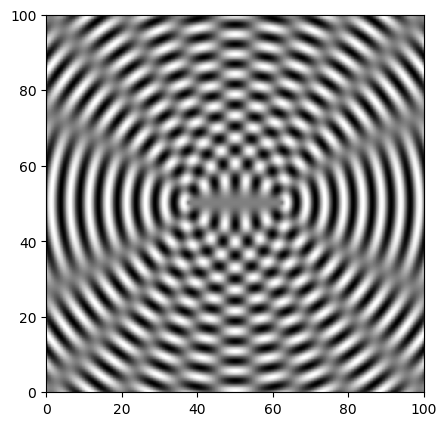

In [3]:
waveheight(wavelength=5,separation= 25,pebbles= 2)

Now that we know how to make an image of the heights, next step is to animate it to mimic the the ripple effect you see when you drop a pebble in a pool. We can do this by importing animation from matplotlib.

First, we would need to set up the grid:

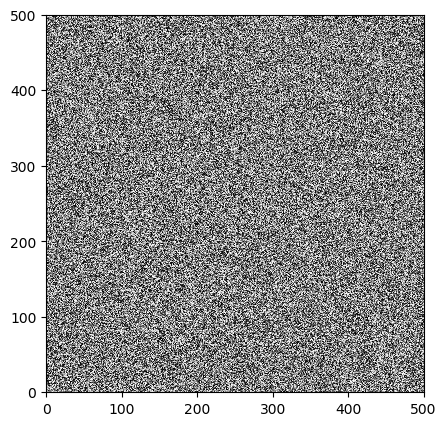

In [2]:
side = 100.0 #length of grid
points = 500 #how many points in the grid

fig = plt.figure(figsize=[5,5], dpi=100) 
ax = plt.axes(xlim=(0, points), ylim=(0, points))
plt.gray()
xi = np.random.random((points,points)) #generate an array to store values of xi
im = plt.imshow(xi, origin="lower", extent=[0,points,0,points])

We then need to initialize a starting image for our animation:

In [3]:
def init():
    xi = np.zeros((points,points),float) #generate an array plot/frame
    im.set_array(xi)
    return [im]

Before moving on to defining an animation function and calling the animator, we first need a normalizing function. This function will scale numbers to between 0 and 1, which will help with the color gradient of the animation we will produce. The gradient is between 0 (which is represented by the color black) and 1 (white). 

In [4]:
def normalize(minimum, maximum, value):
    return (value-minimum)/(maximum-minimum)

Now we can finally define a function that would call the animator and a function that would be called sequentially. The code for the animation step is similar to the waveheight function we defined earlier. 

In [5]:
from IPython.display import HTML
import matplotlib.animation as animation

def update_plot(wavelength, separation, speed,pebbles):
    plt.rcParams['animation.embed_limit'] = 512 * 1024 * 1024 # increase animation limit to 512 mb
    anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=100, fargs=(wavelength, separation, pebbles,speed), interval=30, blit=False)
    #init_func= used to draw a clear frame 
    #fargs= additional arguments to pass to each call 
    
    display(HTML(anim.to_jshtml())) #encode animation as an HTML5 video  

In [6]:
def animate(frame, wavelength, separation, pebbles,speed):

    k = 2*pi/wavelength
    amp =1.0 #amplitude              
    spacing = side/points 
    minimum= -amp*pebbles #minimum possible height value
    maximum=amp*pebbles #maximum possible height value
    
    xi = np.zeros((points, points),float)
    
    x_list = []
    y_list = []
    
    for i in range(pebbles):
        x = (side - ((pebbles - 1) * separation)) / 2 + (separation * i)
        y = side / 2
        
        x_list.append(x)
        y_list.append(y)

    for i in range(points):
        y = spacing*i
        for j in range(points):
            x = spacing*j
            
            r = []
            for l in range(pebbles):
                x1 = x_list[l]
                y1 = y_list[l]
                
                r.append(sqrt((x-x1)**2+(y-y1)**2))
            
            total = 0
            for l in range(pebbles):
                total += amp * (sin(k*r[l] - (frame *speed)))
                
            xi[i,j] = normalize(minimum, maximum, total) #normalize the height

    im.set_array(xi) #set image to xi

    return [im] 

Since our animation is basically done, we can add widgets to our plots to make it interactive. Here we can control how many pebbles we want to simulate, the wavelength, and the separation between pebbles. In order to do this, we need to import ipywidgets.

In [7]:
import ipywidgets as widgets

#create sliders for separation and wavelength
#min/max= minimum/maximum value you want, value= value you want the slider to be initially set to
#step= interval between each number from min and max

separation= widgets.FloatSlider(min=5, max=50, value=25, step=5, descritption="Separation")
wavelength=widgets.FloatSlider(min=0, max=10, value=5 ,step=.5, description="Wavelength")
speed=widgets.FloatSlider(min=0, max=1, value=.25 ,step=.05, description="Speed")


#create dropdown to choose how many number of pebbles to simulate
pebbles=widgets.Dropdown(options=[1,2,3,4,5], value=1, description= 'Number of Pebbles:', disabled=False)

#call interact_manual function
#allows you to restrict execution so its only done on demand
#we can use widgets.interactive instead if we want to change variables while animation is going
#however it will be very slow

widgets.interact_manual(update_plot, separation=separation, wavelength=wavelength, pebbles=pebbles, speed=speed)

interactive(children=(FloatSlider(value=5.0, description='Wavelength', max=10.0, step=0.5), FloatSlider(value=…

<function __main__.update_plot(wavelength, separation, speed, pebbles)>

In [8]:
widgets.interact_manual(update_plot, separation=separation, wavelength=wavelength, pebbles=pebbles, speed=speed)

interactive(children=(FloatSlider(value=5.0, description='Wavelength', max=10.0, step=0.5), FloatSlider(value=…

<function __main__.update_plot(wavelength, separation, speed, pebbles)>

In [9]:
widgets.interact_manual(update_plot, separation=separation, wavelength=wavelength, pebbles=pebbles, speed=speed)

interactive(children=(FloatSlider(value=5.0, description='Wavelength', max=10.0, step=0.5), FloatSlider(value=…

<function __main__.update_plot(wavelength, separation, speed, pebbles)>